In [1]:
from lib import *
from features import *

# importing data

In [2]:
data = pd.read_csv('./train_data.csv')

In [3]:
data = data.sample(frac=0.4).reset_index(drop=True)
size = data.shape
size

(84484, 3)

# Data Visualisation
#showing data distribution over the four categories of headlines
m-Medical
e-Entertainment
b-Bussiness
t-Tech

(array([ 9062.,     0.,     0., 21573.,     0.,     0., 23258.,     0.,
            0., 30591.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

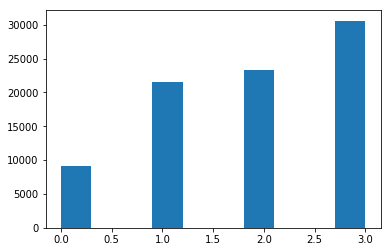

In [4]:
plt.hist(data.CATEGORY.factorize()[0])

# Data  samples

In [5]:
data.head()

,ID,TITLE,CATEGORY
0,158772,La. company settles Medicare fraud allegations,m
1,136750,NASA News: Potentially Habitable Earth-Sized P...,t
2,38819,Gas Prices In Maryland Soar To 6-Month High,t
3,122188,Samsung Galaxy S5 Hack: Test Hackers Able to G...,t
4,80702,Greece to get €8.3bn bailout after reforms app...,b


In [6]:
for line,i in zip(data['TITLE'],range(data['TITLE'].shape[0])):
    data.loc[i,('TITLE')] = normalise_text(line)

In [7]:
data.head()

,ID,TITLE,CATEGORY
0,158772,la company settles medicare fraud allegations,m
1,136750,nasa news potentially habitable earthsized pla...,t
2,38819,gas prices maryland soar 6month high,t
3,122188,samsung galaxy s5 hack test hackers able gain ...,t
4,80702,greece get 83bn bailout reforms approved,b


In [8]:
cv_matrix, cv = countVectorizer(data)

In [9]:
tv_matrix, tv = tfidfTransformer(cv_matrix)

In [10]:
categories = data.CATEGORY.factorize()[0]

In [11]:

training_data, testing_data, training_op, test_op = split_data(tv_matrix,categories)

In [12]:
rfc_model = RandomForestClassifier(min_samples_split=20,criterion='entropy',random_state=10)

In [13]:
rfc_model.fit(training_data,training_op)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [14]:
rfc_model.score(training_data,training_op)

0.9740778552088419

In [15]:
rfc_model.score(testing_data,test_op)

0.8790909628928212

In [16]:
#url = "http://www.bbc.com/"
url = "https://in.yahoo.com/?p=us"
headlines = extract_hedlines(url)

In [17]:
for lines, i in zip(headlines, range(len(headlines))):
    headlines[i] = normalise_text(lines)

In [18]:
testing_headlines = pd.DataFrame({"TITLE":headlines})

In [19]:
testing_cv_matrix = cv.transform(testing_headlines['TITLE'])

In [20]:
testing_cv_matrix = testing_cv_matrix.toarray()


In [21]:
transformed_testing_data = tv.transform(testing_cv_matrix) 

In [22]:
prediction = rfc_model.predict(transformed_testing_data)

In [23]:
for i in range(testing_headlines['TITLE'].shape[0]):
    if(len(testing_headlines.TITLE[i])>20):
        print(testing_headlines.TITLE[i]," ",data.CATEGORY.factorize()[1][prediction[i]])

nita mukesh ambani hosted ganpati celebrations antilla mumbai   e
know aishwarya rai bachchan avid follower lord ganesha daughter aaradhya bachchan minutes ago mother-daughter duo seen visiting gsb mandal seek blessing lord ganesha .   e
talk favourite btown jodi 's one name , always pops mind 're none shahrukh khan gauri khan . gauri shahrukh marriage goals like every married couple , also   e
bigg boss known controversies season 12 reality show days away grand premiere ex-contestants revealed although show scripted , well   e
priyanka chopra reveals left salman khans bharat . ’ heard much priyanka chopra walked big salman khan starrer bharat . know real reason .   e
incredible set photographs iceland taken sky left viewers confusing landscape abstract art florian ledoux 28 , captured rare bird ’ s-eye views hills , water craters iceland . “ people often wonder photographs first , ” said , “ say looks totally abstract , like painting. ” ( caters news ) see news-related photo galleries